# Projeto 2 - Análise de Dados do Naufrágio do Titanic
Curso: Fundamentos de Data Science I 

Aluno: Filipe Pegollo

## Introdução
Esta análise foi realizada em uma amostra de dados do naufrágio do RMS Titanic, um dos mais conhecidos da história que ocorreu em sua viagem inaugural em 15 de abril de 1912. Das 2224 pessoas a bordo, 1502 morreram quando o grande navio afundou após se colidir com um iceberg. A tragédia contribuiu para melhoria das normas de segurança dos navios.<br>
A grande taxa de mortalidade se deu porque não havia botes salva-vidas suficientes para toda a tripulação, por isso apesar de vários fatores que poderiam interferir na taxa de sobrevivência alguns grupos foram priorizados nos embarques nos botes.
Iremos utilizar o processo de análise de dados para identificar estes grupos através de variáveis, formular perguntas e compartilhar as descobertas através de apresentações de dados calculados e gráficos.

## Apresentação da Base de Dados
O arquivo analisado é um conjunto de dados delimitado por vírgulas do tipo `CSV`. Este arquivo contém dados reais de 891 dos 2224 passageiros e tripulantes a bordo do Titanic. Este arquivo foi obtido no site Kaggle, através de um link fornecido pela Udacity: <br>
https://www.kaggle.com/c/titanic/data
<br><br><br>
__Dicionário de Dados:__

| Variável | Definição | Chaves |
|------|------|------|
|survival| 	Sobreviveu| 	0 = Não, 1 = Sim
|Pclass| Classe do Ingresso |	1 = 1ª, 2 = 2ª, 3 = 3ª
|sex| 	Sexo do Passageiro	
|Age| 	Idade em Anos
|sibsp| Irmãos / Conjuges à bordo
|parch| Pais / Filhos à bordo
|ticket |	Número do Ingresso	
|fare| 	Valor da tarifa paga
|cabin| 	Número da Cabine	
|embarked| 	Porto de Embarque | 	C = Cherbourg<br> Q = Queenstown<br> S = Southampton<br>

__Observações das variáveis:__

`Pclass`: Representa um status sócio-econômico<br>
1ª = Superior<br>
2ª = Média<br>
3ª = Inferior<br>

`Age`: A idade é fracionada se for menor que 1. Se a idade for estimada está no formato `xx.5`

`parch`: Algumas crianças viajaram apenas com uma babá, estas estão com o valor `parch=0`

   ## Possíveis Questões para Análises
Após a avaliação inicial é possível identificar algumas variáveis como `Survived`, `Pclass`, `Sex` e `Age`. A partir destas variáveis podemos levantar as seguintes questões à serem exploradas:
1. Qual o número de sobreviventes?
* Qual o número de vítimas?
* Qual a proporção de vítimas e sobreviventes?
* Passageiros de classes superiores tiveram mais chances de sobreviver?
* Quais foram mais propensos a sobreviver, homens ou mulheres?
* Qual a idade do passageiro mais jovem?
* Qual a idade do passageiro mais mais velho?
* Qual a média de idade dos passageiros?
* O índice de sobrevivência sofre impacto pela faixa etária?
* Quais os fatores que mais influenciaram na taxa de sobrevivência?

Agora que levantamos algumas questões vamos limpar e manipular os dados para melhorar o fluxo de análise.

## Avaliando os Dados
Primeiramente vamos ler o arquivo `titanic_data_6.csv` e avaliar algumas características como tipos de dados, quantidade, e tamanhos de linhas e colunas.

In [1]:
# Importando os pacotes lendo o arquivo e armazenando em um Dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set(style="darkgrid")
% matplotlib inline

df_t = pd.read_csv('titanic_data_6.csv')

Vizualizando amostra dos dados

In [2]:
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Verificando a quantidade de linhas e colunas e se o dataframe possui algum item duplicado

In [3]:
# Imprime a quantidade de linhas e colunas
print('O dataframe do titanic possui: {} linhas e {} colunas'.format(df_t.shape[0], df_t.shape[1]))

# Verifica se possui itens duplicados
if df_t.duplicated().sum() > 0:
    print('\n{} itens duplicados'.format(df_t.duplicated().sum()))
else:
    print('\nNão possui itens duplicados')    

O dataframe do titanic possui: 891 linhas e 12 colunas

Não possui itens duplicados


Verificando os tipos de dados e colunas com valores nulos

In [4]:
df_t.info()

# Verifica se a coluna possui algum valor nulo, caso positivo imprime o nome
print('\nColunas com valores nulos: {}'.format(df_t.columns[df_t.isnull().any()].values))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

Colunas com valores nulos: ['Age' 'Cabin' 'Embarked']


## Limpando os Dados
Vamos eliminar colunas que não serão utilizadas nesta análise e renomear as colunas para letras minúsculas para facilitar a codificação.

In [5]:
# Descarta colunas que não serão utilizadas
# axis=1 para informar que estamos nos referindo a colunas
# inplace=True para substituir as alterações no dataframe
df_t.drop(['SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [6]:
# Renomeia colunas para letras minúsculas
df_t.rename(columns=lambda x: x.lower(), inplace=True)

# Altera rótulos das colunas para português
df_t.rename(columns={'passengerid':'id_passageiro', 'pclass':'classe', 'name':'nome', 'survived':'sobreviveu', 
                     'sex':'sexo', 'age':'idade'}, inplace=True)

Como o conjunto de dados já possui um identificador vamos utilizá-lo como índice

In [7]:
df_t.set_index('id_passageiro', inplace=True)

Verificando as alterações

In [8]:
df_t.head()

,sobreviveu,classe,nome,sexo,idade
id_passageiro,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0


## Manipulação de Valores e Tipos de Dados
Com o objetivo de facilitar as análises vamos alterar alguns valores substituindo por termos mais claros e alterar o tipo de dados da coluna se for preciso

In [9]:
# Altera os valores da coluna sexo para masculino e feminino
df_t.replace({'sexo':{'male':'masculino', 'female':'feminino'}}, inplace=True)

Para alterar os valores da coluna `sobreviveu` primeiro precisamos converter de int para string

In [10]:
df_t['sobreviveu'] = df_t['sobreviveu'].astype(str)

Agora que convertemos, podemos alterar os valores

In [11]:
df_t.replace({'sobreviveu':{'0':'não', '1':'sim'}}, inplace=True)

Verificando as alterações

In [12]:
df_t.head()

,sobreviveu,classe,nome,sexo,idade
id_passageiro,,,,,
1,não,3,"Braund, Mr. Owen Harris",masculino,22.0
2,sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feminino,38.0
3,sim,3,"Heikkinen, Miss. Laina",feminino,26.0
4,sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",feminino,35.0
5,não,3,"Allen, Mr. William Henry",masculino,35.0


In [13]:
# Salvando o conjunto de dados limpos em um novo arquivo
df_t.to_csv('titanic_data_6_clean.csv', index=True)

## Exploração e Análise de Dados
Agora que temos os dados limpos e tratados vamos explorar os dados levantando números e criando gráficos para as análises

In [14]:
# Verifica a quantidade de sobreviventes
print('Não Sobreviventes: {}'.format(df_t['sobreviveu'].value_counts()[0]))
print('Sobreviventes: {}'.format(df_t['sobreviveu'].value_counts()[1]))

Não Sobreviventes: 549
Sobreviventes: 342


Gráfico de barras para vizualizar o número de vítimas sobreviventes:

Text(0,0.5,'Nº de Passageiros')

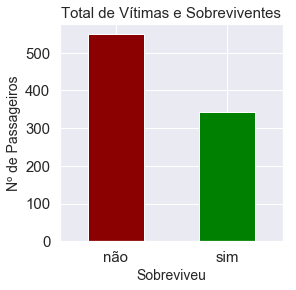

In [15]:
# Cria um gráfico de barras
df_t['sobreviveu'].value_counts().plot(kind='bar', fontsize=15, figsize=(4,4), color=['darkred', 'green'], rot=0)

# Ajusta o tamanho da fonte do título para ficar igual dos labels
plt.title('Total de Vítimas e Sobreviventes', fontsize=15)
plt.xlabel('Sobreviveu',fontsize=14)
plt.ylabel('Nº de Passageiros',fontsize=14)

Agora vamos criar um gráfico de pizza com a proporção dos sobreviventes:

Text(0,0.5,'Sobreviveu')

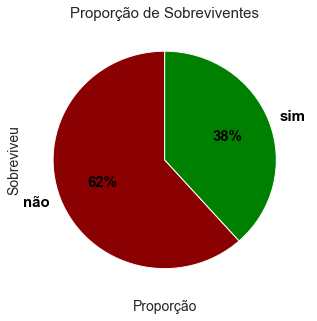

In [16]:
df_t['sobreviveu'].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=90, fontsize=15, figsize=(5,5),
                                       colors=['darkred', 'green'], textprops=dict(color='black', weight='bold'))
plt.title('Proporção de Sobreviventes', fontsize=15)
plt.xlabel('Proporção',fontsize=14)
plt.ylabel('Sobreviveu',fontsize=14)

#### Observação:
Análisando estes dados e gráficos podemos ver que a maioria dos tripulantes do conjunto de dados não sobreviveu. Agora vamos verificar fatores que influenciaram neste resultado.

Gráfico de pizza para avaliar a proporção de classes:

Text(0,0.5,'Classe')

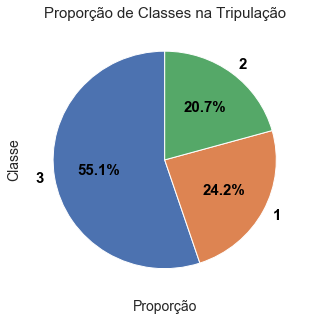

In [17]:
df_t['classe'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, fontsize=15, figsize=(5,5),
                                   textprops=dict(color='black', weight='bold'))
plt.title('Proporção de Classes na Tripulação', fontsize=15)
plt.xlabel('Proporção',fontsize=14)
plt.ylabel('Classe',fontsize=14)

#### Observação:
É possível ver neste gráfico que a maioria da tripulação era da terceira classe, então a tendência natural seria que tivesse maior número de vítimas e sobreviventes, mas vamos verificar se foi realmente isso que aconteceu

Utilizando groupby para verificar o total de sobreviventes por classe:

In [18]:
df_t.groupby(['classe', 'sobreviveu'])['classe'].count()

classe  sobreviveu
1       não            80
        sim           136
2       não            97
        sim            87
3       não           372
        sim           119
Name: classe, dtype: int64

Agora vamos criar um gráfico de barras empilhado para melhor visualização:

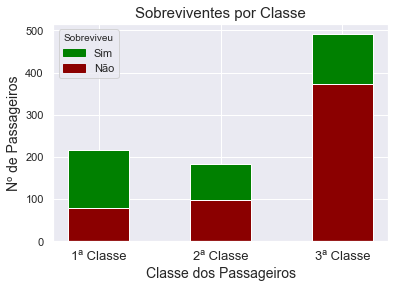

In [19]:
# Cria uma tabela para contar as vítimas e sobreviventes por classe
cl_sob = df_t.pivot_table(values='nome', index='classe', aggfunc='count', columns='sobreviveu')

# Cria as barras de sobreviventes divididos por classe 
# 'bottom' é utilizado para alinhar uma coluna sobre a outra
x_pos = np.arange(len(cl_sob['não']))
bar_n = plt.bar(x_pos, cl_sob['não'], 0.5, color='darkred')
bar_s = plt.bar(x_pos, cl_sob['sim'], 0.5, color='green', bottom=cl_sob['não'])

# Definindo título e labels do eixo x
plt.title('Sobreviventes por Classe', fontsize=15)
plt.xticks(x_pos, ('1ª Classe', '2ª Classe', '3ª Classe'), fontsize=13)
plt.xlabel('Classe dos Passageiros',fontsize=14)
plt.ylabel('Nº de Passageiros',fontsize=14)

# Definindo parâmetros da legenda
sim = mpatches.Patch(color='green', label='Sim')
nao = mpatches.Patch(color='darkred', label='Não')
plt.legend(title='Sobreviveu', handles=[sim, nao], loc=2)

plt.show()

#### Função para calcular as proporções:
Para otimizar a codificação vamos criar uma função que recebe o número de sobreviventes e vítimas de determinada variável e calcula o valor proporcional ao número total.

In [20]:
# Cria a função para calcular as proporções para que possa ser usada em outros casos
def calc_prop(lista):
    """
        Função para calcular a proporção de uma lista
        Argumentos:
            Lista: Tabela com o número de sobreviventes por determinada variável
        Retorna:
            Uma lista com a taxa proporcional de sobreviventes
    """
    for i in range(len(lista)):
        prop = (lista['sim'].iloc[i] / lista.iloc[i].sum()) * 100
        print('{}: {:.2f} %'.format(str(lista.index[i]).title(), prop))

In [21]:
print('Taxa de Sobrevivência por Classe')

# Utilizando a função para calcular a proporção por classe
calc_prop(cl_sob)

Taxa de Sobrevivência por Classe
1: 62.96 %
2: 47.28 %
3: 24.24 %


#### Observação:
Como podemos ver nos gráficos e informações acima, a 1ª classe possuía um número total bem menor do que a 3ª classe, no entanto teve um número maior de sobreviventes e um número menor de vítimas, enquanto a 3ª classe foi o oposto tendo o maior número de vítimas e menor taxa proporcional de sobrevivência.

Criando gráfico de pizza para avaliar a proporção de homens e mulheres:

Text(0,0.5,'sexo')

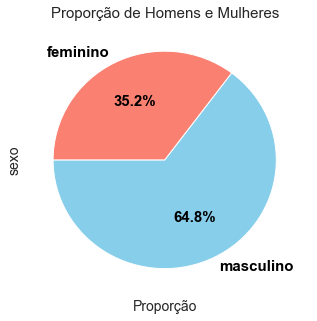

In [22]:
df_t['sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=180, fontsize=15, figsize=(5,5), 
                                 colors=['skyblue', 'salmon'], textprops=dict(color='black', weight='bold'))
plt.title('Proporção de Homens e Mulheres', fontsize=15)
plt.xlabel('Proporção',fontsize=14)
plt.ylabel('sexo',fontsize=14)

Agora vamos criar um gráfico com a distribuição de homens e mulheres por classe:

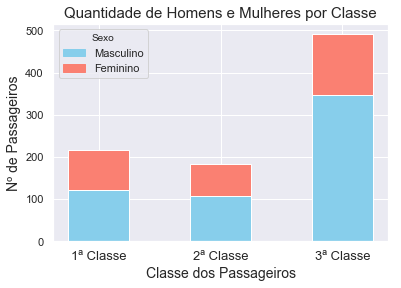

In [23]:
# Cria uma tabela com os dados e armazena em uma variável
cl_sx = df_t.pivot_table(values='nome', index='classe', aggfunc='count', columns='sexo')

# Cria as barras 'bottom' é utilizado para alinhar uma coluna sobre a outra
x_pos = np.arange(len(cl_sx['masculino']))
bar_n = plt.bar(x_pos, cl_sx['masculino'], 0.5, color='skyblue')
bar_s = plt.bar(x_pos, cl_sx['feminino'], 0.5, color='salmon', bottom=cl_sx['masculino'])

# Definindo título e labels do eixo x
plt.title('Quantidade de Homens e Mulheres por Classe', fontsize=15)
plt.xticks(x_pos, ('1ª Classe', '2ª Classe', '3ª Classe'), fontsize=13)
plt.xlabel('Classe dos Passageiros',fontsize=14)
plt.ylabel('Nº de Passageiros',fontsize=14)

# Definindo parâmetros da legenda
homens = mpatches.Patch(color='skyblue', label='Masculino')
mulheres = mpatches.Patch(color='salmon', label='Feminino')
plt.legend(title='Sexo', handles=[homens, mulheres], loc=2)

plt.show()

#### Observação:
A quantidade de homens é predominante no geral e também em cada classe, vamos verificar se a taxa se sobreviventes acompanhou a proporção do sexo.

Utilizando groupby para verificar o total de sobreviventes por sexo:

In [24]:
df_t.groupby(['sexo', 'sobreviveu'])['sexo'].count()

sexo       sobreviveu
feminino   não            81
           sim           233
masculino  não           468
           sim           109
Name: sexo, dtype: int64

Agora vamos criar um gráfico de barras empilhado para melhor visualização do número de sobreviventes por gênero:

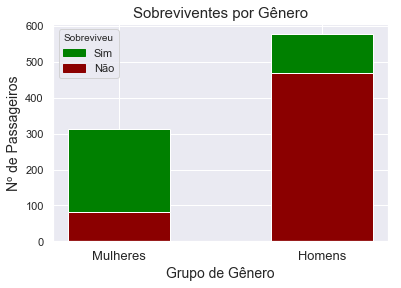

In [25]:
# Cria uma tabela para contar as vítimas e sobreviventes por sexo
sx_sob = df_t.pivot_table(values='nome', index='sexo', aggfunc='count', columns='sobreviveu')

# Cria as barras de sobreviventes divididos por classe 
# 'bottom' é utilizado para alinhar uma coluna sobre a outra
x_pos = np.arange(len(sx_sob['não']))
bar_n = plt.bar(x_pos, sx_sob['não'], 0.5, color='darkred')
bar_s = plt.bar(x_pos, sx_sob['sim'], 0.5, color='green', bottom=sx_sob['não'])

# Definindo título e labels do eixo x
plt.title('Sobreviventes por Gênero', fontsize=15)
plt.xticks(x_pos, ('Mulheres', 'Homens'), fontsize=13)
plt.xlabel('Grupo de Gênero',fontsize=14)
plt.ylabel('Nº de Passageiros',fontsize=14)

# Definindo parâmetros da legenda
sim = mpatches.Patch(color='green', label='Sim')
nao = mpatches.Patch(color='darkred', label='Não')
plt.legend(title='Sobreviveu', handles=[sim, nao], loc=2)

plt.show()

In [26]:
print('Taxa de Sobrevivência por Gênero')

# Utilizando a função para calcular a proporção por gênero
calc_prop(sx_sob)

Taxa de Sobrevivência por Gênero
Feminino: 74.20 %
Masculino: 18.89 %


#### Observação:
Assim como em relação as classes o número de sobreviventes por gênero também não acompanhou a proporção total, isso significa que o sexo do passageiro também influenciou na taxa de sobrevivência. As mulheres tiveram uma taxa muito maior do que a dos homens. Agora vamos verificar outra variável a idade.

## Filtrando Valores Nulos e Classificando Dados
Como foi visto na avaliação dos dados, a coluna de idade possui valores nulos, por isso vamos filtrar para remover estes valores, e depois, para facilitar a análise vamos classificar os passageiros em `crianças`, `adultos` e `idosos`

In [27]:
# Filtra apenas valores de idade que não sejam nulos
df_t = df_t[df_t['idade'].notna()]

# Confirma se existe algum valor nulo na coluna
print(df_t['idade'].isnull().sum().any())

False


Agora vamos verificar a idade do passageiro mais jovem e mais velho, e verificar a idade média dos passageiros. <br>
Idades abaixo de um ano estão fracionadas por isso precisamos verificar e converter para meses caso necessário.

In [28]:
# Verifica se idade mínima é menor que 1 ano
if df_t['idade'].min() < 1:
    idade = int(df_t['idade'].min()* 12)
    print('Passageiro mais jovem: {} meses'.format(idade))
else:
    print('Passageiro mais jovem: {} anos'.format(df_t['idade'].min()))

# Verifica a idade máxima
print('Passageiro mais velho: {:.0f} anos'.format(df_t['idade'].max()))

# Verifica a média de idades
print('Idade média dos passageiros: {:.0f} anos'.format(df_t['idade'].mean()))

Passageiro mais jovem: 5 meses
Passageiro mais velho: 80 anos
Idade média dos passageiros: 30 anos


Agora iremos classificar as idades da seguinte forma:
* Crianças: De 0 a 17 anos
* Adultos: De 18 a 64 anos
* Idosos: De 65 anos em diante

Para isso iremos criar uma coluna para armazenar a faixa etária chamada `faixa_e`

In [29]:
# Seleciona passageiros com idade menor ou igual a 17 anos
# e adiciona a classificação crianças a nova coluna de faixa etária
df_t.loc[df_t['idade'] <= 17, 'faixa_e'] = 'crianças'

# Classifica passageiros adultos com idade maior que 17 e menor ou igual a 64 anos
df_t.loc[(df_t['idade'] > 17) & (df_t['idade'] <= 64), 'faixa_e'] = 'adultos'

# Classifica passageiros idosos com idade maior que 64 anos
df_t.loc[df_t['idade'] > 64, 'faixa_e'] = 'idosos'

Verificando as alterações:

In [30]:
df_t.head(9)

,sobreviveu,classe,nome,sexo,idade,faixa_e
id_passageiro,,,,,,
1,não,3,"Braund, Mr. Owen Harris",masculino,22.0,adultos
2,sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feminino,38.0,adultos
3,sim,3,"Heikkinen, Miss. Laina",feminino,26.0,adultos
4,sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",feminino,35.0,adultos
5,não,3,"Allen, Mr. William Henry",masculino,35.0,adultos
7,não,1,"McCarthy, Mr. Timothy J",masculino,54.0,adultos
8,não,3,"Palsson, Master. Gosta Leonard",masculino,2.0,crianças
9,sim,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",feminino,27.0,adultos
10,sim,2,"Nasser, Mrs. Nicholas (Adele Achem)",feminino,14.0,crianças


Verificando a quantidade de passageiros por faixa etária:

In [31]:
df_t['faixa_e'].value_counts()

adultos     590
crianças    113
idosos       11
Name: faixa_e, dtype: int64

Criando gráfico de pizza para avaliar a proporção de idades

Text(0,0.5,'Faixa Etária')

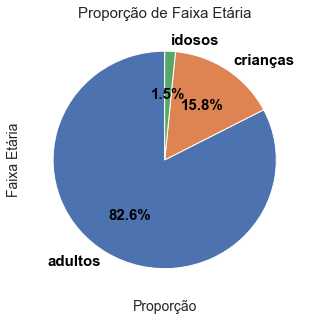

In [32]:
df_t['faixa_e'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, fontsize=15, figsize=(5,5), label='',
                                   textprops=dict(color='black', weight='bold'))
plt.title('Proporção de Faixa Etária', fontsize=15)
plt.xlabel('Proporção',fontsize=14)
plt.ylabel('Faixa Etária',fontsize=14)

Utilizando groupby para verificar o total de sobreviventes por faixa etária

In [33]:
df_t.groupby(['faixa_e', 'sobreviveu'])['faixa_e'].count()

faixa_e   sobreviveu
adultos   não           362
          sim           228
crianças  não            52
          sim            61
idosos    não            10
          sim             1
Name: faixa_e, dtype: int64

Agora vamos criar um gráfico de barras empilhado para melhor visualização dos sobreviventes por faixa etária

In [34]:
# Tabela com a contagem de sobreviventes por faixa etária
tab_idades = df_t.pivot_table(values='nome', index='faixa_e', aggfunc='count', columns='sobreviveu')

# Para que o gráfico saia na ordem correta e não alfabética foram criadas chaves para as faixas
tab_idades.loc['crianças', 'id'] = 1
tab_idades.loc['adultos', 'id'] = 2
tab_idades.loc['idosos', 'id'] = 3

# Ordena a lista pelo id criado
tab_idades.sort_values(by=['id'], inplace=True)

tab_idades

sobreviveu,não,sim,id
faixa_e,,,
crianças,52,61,1.0
adultos,362,228,2.0
idosos,10,1,3.0


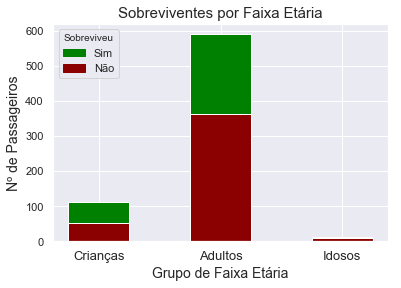

In [35]:
# Cria as barras de sobreviventes divididos por classe 
# 'bottom' é utilizado para alinhar uma coluna sobre a outra
x_pos = np.arange(len(tab_idades['não']))
bar_n = plt.bar(x_pos, tab_idades['não'], 0.5, color='darkred')
bar_s = plt.bar(x_pos, tab_idades['sim'], 0.5, color='green', bottom=tab_idades['não'])

# Definindo título e labels do eixo x
plt.title('Sobreviventes por Faixa Etária', fontsize=15)
plt.xticks(x_pos, ('Crianças', 'Adultos', 'Idosos'), fontsize=13)
plt.xlabel('Grupo de Faixa Etária',fontsize=14)
plt.ylabel('Nº de Passageiros',fontsize=14)

# Definindo parâmetros da legenda
sim = mpatches.Patch(color='green', label='Sim')
nao = mpatches.Patch(color='darkred', label='Não')
plt.legend(title='Sobreviveu', handles=[sim, nao], loc=2)

plt.show()

In [36]:
print('Taxa de Sobrevivência por Faixa Etária')

# Utilizando a função para calcular a proporção por Idade
calc_prop(tab_idades)

Taxa de Sobrevivência por Faixa Etária
Crianças: 53.51 %
Adultos: 38.51 %
Idosos: 7.14 %


#### Observação:
As crianças foram as que tiveram a maior taxa de sobrevivência, enquanto os idosos tiveram uma taxa baixíssima os adultos não tiveram uma taxa tão baixa quanto os idosos mas ainda assim menos da metade sobreviveram.

## Conclusão
Dentro dos dados avaliados, mais da metade dos passageiros não sobreviveu, cerca de 62%, após as análises feitas através dos dados e gráficos temos informações suficientes para responder as questões propostas:

1. __*Qual o número de sobreviventes?*__<br>
290<br><br>

* __*Qual o número de vítimas?*__<br>
424<br><br>

* __*Qual a proporção de vítimas e sobreviventes?*__<br>
59% das pessoas não sobreviveram e 41% sobreviveram.<br><br>

* __*Passageiros de classes superiores tiveram mais chances de sobreviver?*__ <br>
Sim, sem dúvida. Principalmente a 1ª classe em relação a 3ª, mesmo tendo um número total bem menor a 1ª classe teve menos vítimas e mais sobreviventes, enquanto a 2ª ficou entre os dois em termos de porporções. <br><br>

* __*Quais foram mais propensos a sobreviver, homens ou mulheres?*__<br>
Mulheres. A maior parte da tripulação era composta por homens 65% contra 35% de mulheres, mesmo avaliando por classes a proporção de homens era maior do que mulheres, mas a taxa de sobreviência não acompanhou essa proporção, a diferença é ainda maior que a comparação de classes: 74% das mulheres sobreviveram, contra 18% dos homens. <br><br>

* __*Qual a idade do passageiro mais jovem?*__<br>
5 meses <br><br>

* __*Qual a idade do passageiro mais mais velho?*__<br>
80 anos <br><br>

* __*Qual a média de idade dos passageiros?*__<br>
29 anos<br><br>

* __*O índice de sobrevivência sofre impacto pela faixa etária?*__<br>
Sim. Um pouco mais da metade das crianças sobreviveram 53% a diferença não é tão grande em relação aos adultos (38%), mas entre os idosos apenas 7% sobreviveram. <br><br>

* __*Quais os fatores que mais influenciaram na taxa de sobrevivência?*__<br>
Dentre os fatores avaliados o que mais influenciou foi o gênero, pois as mulheres tiveram uma taxa de sobreviência muito maior do que os homens. Seguido pelas classes que causaram forte impacto nas taxas e por último a faixa etária que apesar de não ter uma diferença tão grande entre crianças e adultos ainda assim influenciou principalmente entre os idosos. <br><br>

O fato é que estatísticamente falando, se você fosse do sexo feminino, da 1ª classe e criança teria muito mais chances de sobrevivênvia do que se fosse do sexo masculino, 3ª classe e idoso, que por sua vez teria chances altíssimas de não sobreviver. Este resultado se deu provavelmente por prioridades nos embarques dos botes salva vidas e localização dos quartos. <br><br>

## Limitações
Dentro deste projeto foram identificados alguns fatores limitantes nas colunas `sobreviveu` e `idade` que poderiam afetar negativamente e dificultar as análises. As limitações foram listadas e descritas abaixo informando também as ações tomadas para contorná-las:

1. __*Limitação: A coluna `sobreviveu` não possuia representação clara*__<br>
Os valores estavam representados por `0` e `1` que poderiam causar dificuldades e erros de interpretação nas análises se o passageiro sobreviveu ou não. <br><br>
*Ação tomada:* Os valores de `0` e `1` foram substituídos por `não` e `sim`, para tornar isso possível foi preciso converter o tipo de dados da coluna de `int` para `str`. Estas alterações facilitaram a compreensão nas informações estatísticas e visualização nos gráficos.<br><br><br>

* __*Limitação: A coluna `idade` possuia valores nulos*__<br>
Algumas linhas não tinham o valor de idade preenchido, o que poderia causar erros de cálculo nás analises da variável. <br><br>
*Ação tomada:* Após fazer análises de outras variáveis os valores de idade foram filtrados para remover os valores nulos.<br><br><br>

* __*Limitação: Idades menores que 1 ano estavam fracionadas*__<br>
Os valores de idades estavam representados por anos, mas caso fosse menor que 1 anos estavam fracionados, este fator também poderia causar erros de cálculos e interpretação caso não fosse tratado.<br><br>
*Ação tomada:* Durante as análises foi criada uma função para verificar se a idade é menor que 1 e caso positivo converter.<br><br><br>

* __*Limitação: A coluna `idade` possuia muitos valores únicos*__<br>
Um número muito grande de valores únicos dificulta análises de proporções.<br><br>
*Ação tomada:* Foram criados três grupos de idade `crianças`, `adultos` e `idosos`. Que facilitou as análises e criações de gráficos por faixa etária.<br><br><br>

## Fontes:

Matplotlib - Legend guide: <br>
https://matplotlib.org/users/legend_guide.html

Matplotlib - Pie Chart: <br>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie

Matplotlib - Bar Chart: <br>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

Seaborn Examples: <br>
https://seaborn.pydata.org/examples/index.html

Stack Overflow - How to print Y axis label horizontally in a matplotlib / pylab chart: <br>
https://stackoverflow.com/questions/27671748/how-to-print-y-axis-label-horizontally-in-a-matplotlib-pylab-chart

Stack Overflow - Como limitar números decimais em python: <br>
https://pt.stackoverflow.com/questions/176243/como-limitar-n%C3%BAmeros-decimais-em-python

Paulo Vasconcellos - Os 15 melhores comandos de Matplotlib: <br>
https://paulovasconcellos.com.br/15-comandos-de-matplotlib-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-17cf88a75119

Felipe Galvão - Visualização de Dados com Python (matplotlib): <br>
http://felipegalvao.com.br/blog/2016/03/08/visualizacao-de-dados-com-python-matplotlib/

Pandas Docs - Comparison with SQL: <br>
https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

Pandas Docs - Sort Values: <br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

Jupyter Notebook Docs - Working With Markdown Cells: <br>
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html